In [0]:
from fastai import *
from fastai.vision import *


In [0]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [2]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Dataset

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d vbookshelf/v2-plant-seedlings-dataset

100% 3.18G/3.19G [00:55<00:00, 39.9MB/s]
100% 3.19G/3.19G [00:55<00:00, 62.2MB/s]


In [0]:
np.random.seed(42)
src=(ImageList.from_folder('Dataset')
.split_by_rand_pct(valid_pct=0.3,seed=42)
.label_from_folder())


In [0]:
data=(src.transform(get_transforms(),size=224)
.databunch(bs=8).normalize(imagenet_stats))

In [4]:
len(data.train_ds)

7755

In [5]:
len(data.valid_ds)

3323

In [8]:
data.classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'ShepherdтАЩs Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

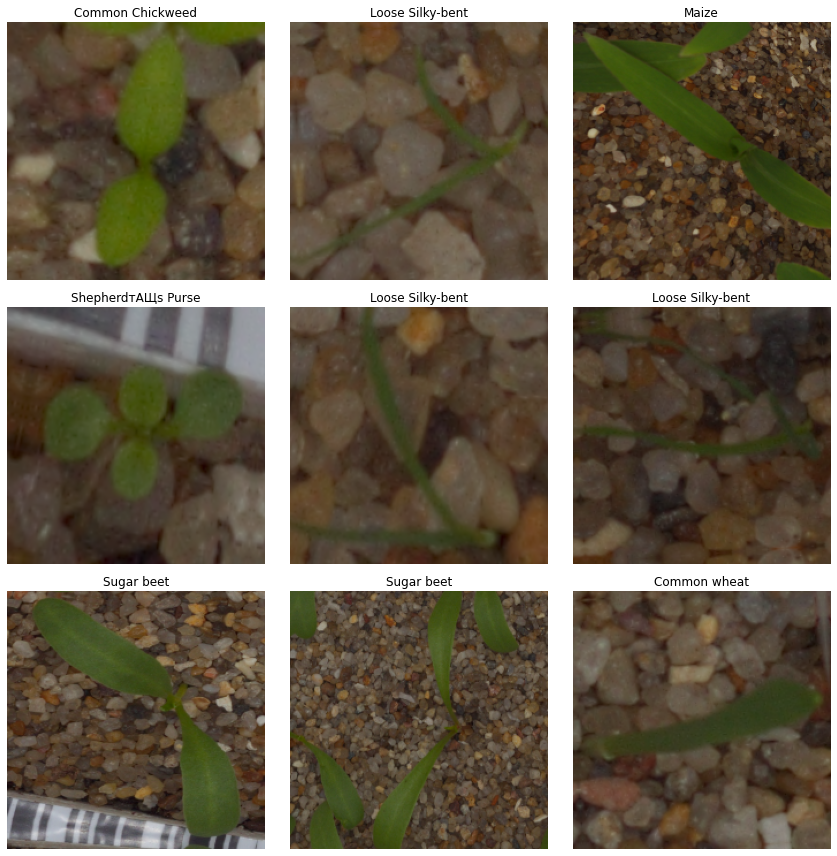

In [6]:
data.show_batch(3,figsize=(12,12))

In [9]:
learn=cnn_learner(data,models.resnet50,metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


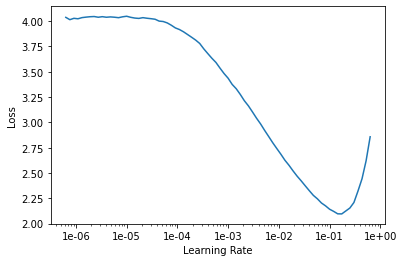

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(4,max_lr=slice(1e-03/2,1e-02/2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.109975,0.345335,0.111044,0.888956,03:43
1,0.502717,0.212444,0.068011,0.931989,03:37
2,0.276003,0.139486,0.045441,0.954559,03:29
3,0.175782,0.127646,0.040626,0.959374,03:32


In [0]:
learn.save('stage-1')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

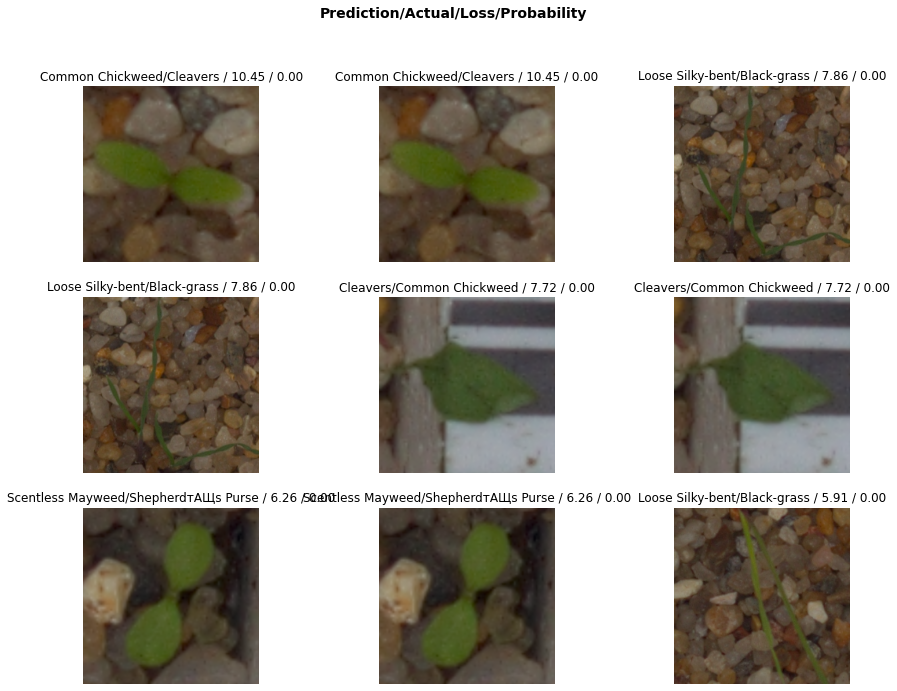

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

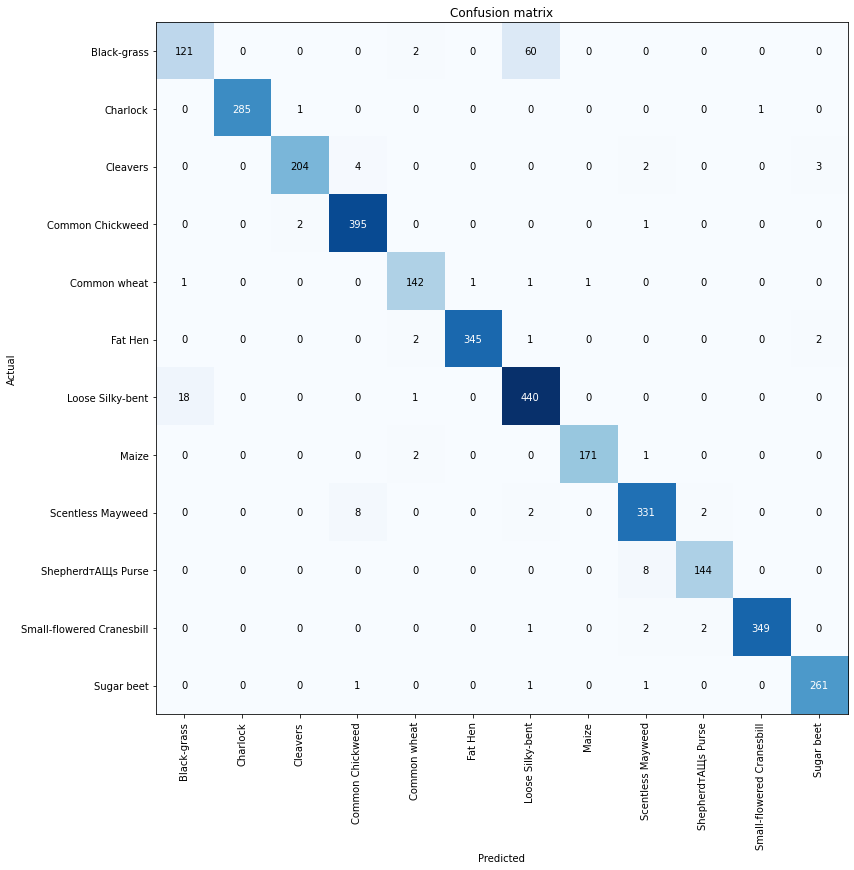

In [16]:
interp.plot_confusion_matrix(figsize=(12,12))

In [17]:
interp.most_confused(min_val=2)

[('Black-grass', 'Loose Silky-bent', 60),
 ('Loose Silky-bent', 'Black-grass', 18),
 ('Scentless Mayweed', 'Common Chickweed', 8),
 ('ShepherdтАЩs Purse', 'Scentless Mayweed', 8),
 ('Cleavers', 'Common Chickweed', 4),
 ('Cleavers', 'Sugar beet', 3),
 ('Black-grass', 'Common wheat', 2),
 ('Cleavers', 'Scentless Mayweed', 2),
 ('Common Chickweed', 'Cleavers', 2),
 ('Fat Hen', 'Common wheat', 2),
 ('Fat Hen', 'Sugar beet', 2),
 ('Maize', 'Common wheat', 2),
 ('Scentless Mayweed', 'Loose Silky-bent', 2),
 ('Scentless Mayweed', 'ShepherdтАЩs Purse', 2),
 ('Small-flowered Cranesbill', 'Scentless Mayweed', 2),
 ('Small-flowered Cranesbill', 'ShepherdтАЩs Purse', 2)]

In [0]:
learn=cnn_learner(data,models.resnet50,metrics=[error_rate,accuracy])

In [0]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.448136,0.180818,0.066506,0.933494,04:51


In [28]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


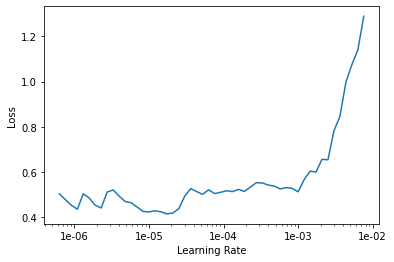

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(4,max_lr=slice(1e-5/2,1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.341239,0.159182,0.056575,0.943425,04:40
1,0.262975,0.118117,0.037617,0.962383,04:45
2,0.276508,0.108321,0.034908,0.965092,04:46
3,0.239922,0.112234,0.035510,0.964490,04:41


In [31]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


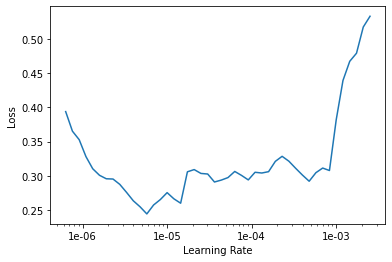

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(3,max_lr=slice(1e-5/10,1e-5/4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.250979,0.111773,0.036112,0.963888,04:41
1,0.241037,0.100178,0.031297,0.968703,04:43
2,0.243844,0.103796,0.032501,0.967499,04:45


In [35]:
interp = ClassificationInterpretation.from_learner(learn)

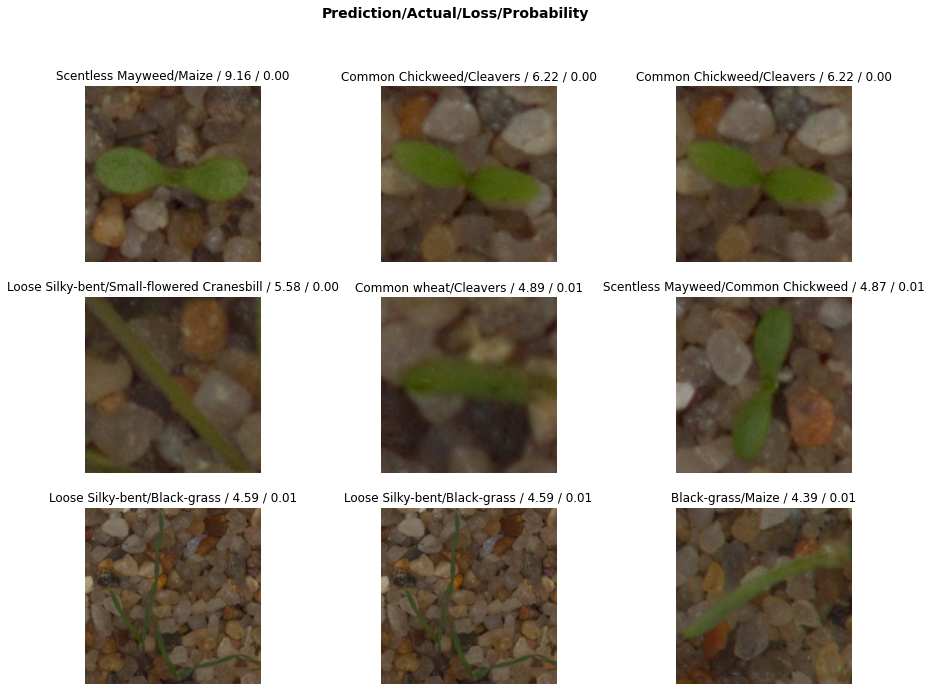

In [36]:
interp.plot_top_losses(9, figsize=(15,11))

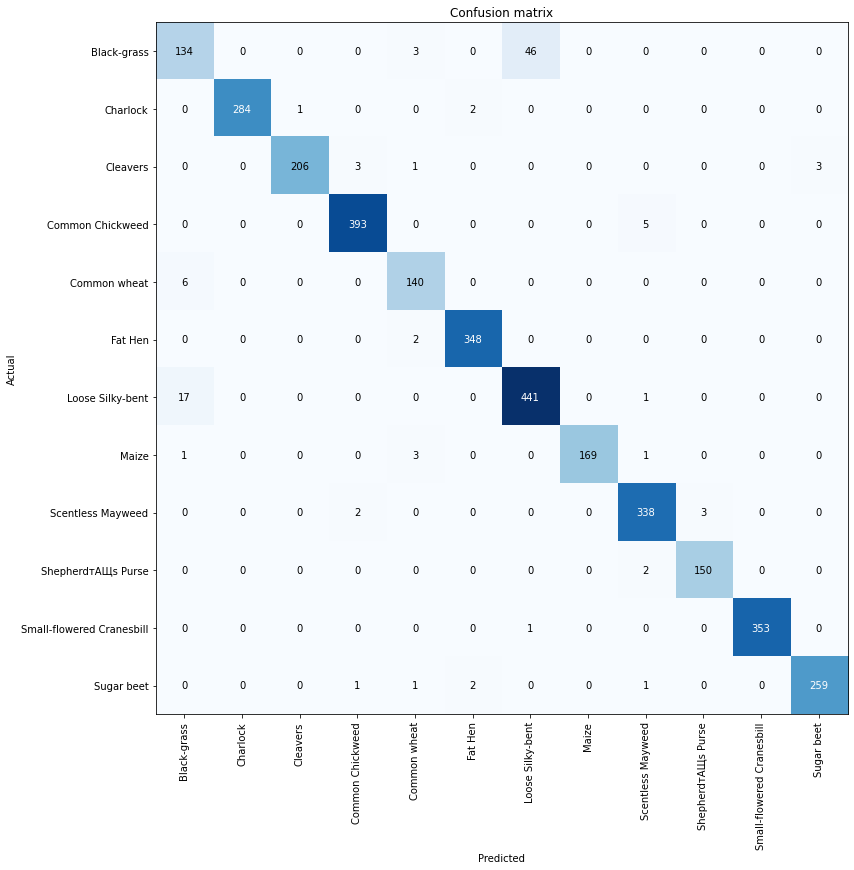

In [37]:
interp.plot_confusion_matrix(figsize=(12,12))

In [0]:
learn.export()

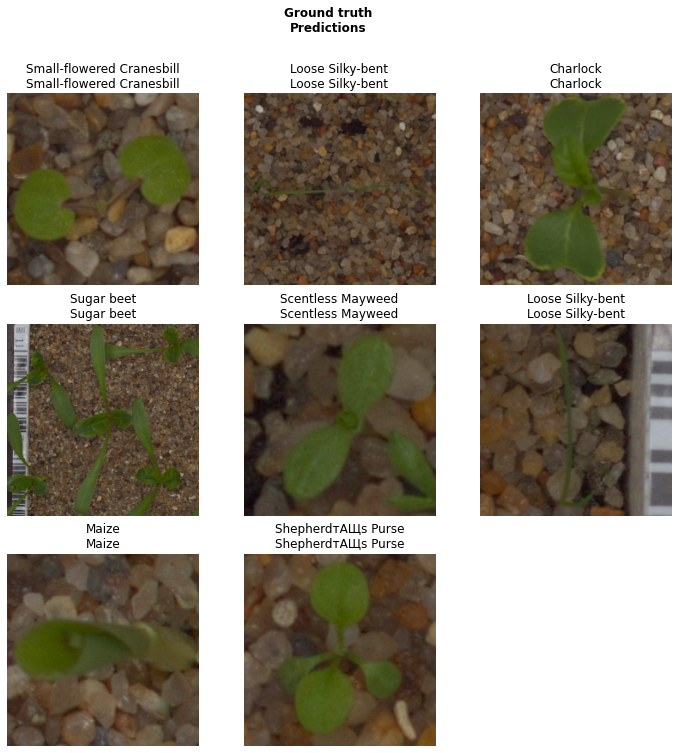

In [47]:
learn.show_results()

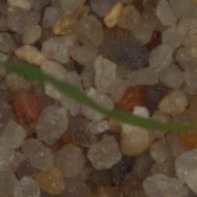

In [42]:
img=open_image('/content/Dataset/Black-grass/102.png')
img

In [43]:
learn.predict(img)

(Category tensor(0),
 tensor(0),
 tensor([5.7696e-01, 2.8698e-04, 6.7105e-04, 9.6431e-04, 1.5586e-02, 3.1409e-04,
         4.0404e-01, 1.3839e-04, 4.6967e-04, 2.7755e-04, 1.8358e-04, 1.0513e-04]))

In [46]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(0)